In [1]:
resume = 0
identifier = "qbert_v_scale"
# identifier = "lfd_retrace"
load_option = "--load-last-model"
# arguments = ["--indir=/data/sarafie/atari/atari_v2_release", "--game=spaceinvaders"]
# arguments = ["--indir=/data/sarafie/atari/atari_v2_release", "--game=mspacman"]
arguments = ["--game=qbert", "--algorithm=rbi"]

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import time

import matplotlib as mpl
import matplotlib.cm as cm

import sys
import os
import cv2
sys.path.append(os.path.join(os.path.abspath("."),".."))
sys.argv = sys.argv[:1]
sys.argv += ["--resume", str(resume), load_option, "--identifier", identifier, *arguments]
from experiment import Experiment
from logger import logger

exp = Experiment(logger.filename)

def gen_function():
    player = exp.demonstrate(params=None)
#     player = exp.play_render(params=None)
    for i, step in enumerate(player):
        
        
        step['v'] = step['v'][0]
        step['aux'] = step['aux'][0]
        o = step['o']
        #o = np.rollaxis(o, 0, 3)[:, :, :3]
        step['o'] = o
        step['i'] = i
        
        yield step
        
        
print("Ready for testing!")

Resuming existing experiment
Ready for testing!


<IPython.core.display.Javascript object>


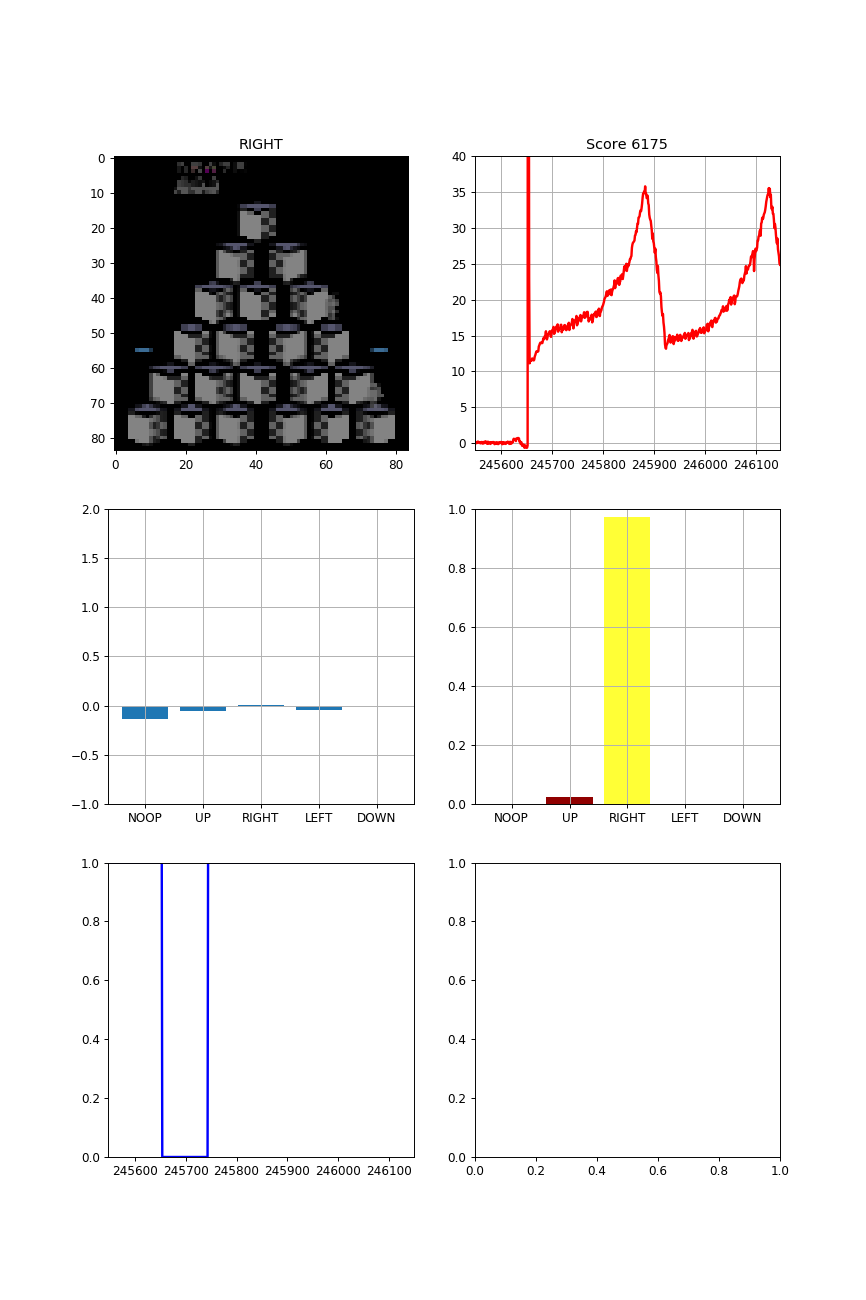

Learning with RBIAgent
Explorer player
[0.0]
()
Get frame


/home/mlspeech/sarafie/anaconda3/envs/torch4/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0
  'bottom=%s, top=%s') % (bottom, top))


In [3]:
pause = False

def onClick(event):
    global pause
    pause ^= True

gen = gen_function()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(10,15))

data = next(gen)
i = data['i']
o = data['o']
v = data['v']
a = data['a']
aux = data['aux']
beta = data['beta']
score = data['score']
q = data['q']
adv = data['adv']
actions = data['actions']


im = ax1.imshow(o, animated=True)
v_data = [v]
frame_index = [i]
aux_data = [aux]

value_plot, = ax2.plot(frame_index, v_data, lw=2, color='r')

adv_plot = ax3.bar(np.arange(len(adv)), adv)

beta_plot = ax4.bar(np.arange(len(beta)), beta)

print(aux_data)
print(aux.shape)

aux_plot, = ax5.plot(frame_index, aux_data, lw=2, color='b')


# ax2.set_ylim(0, 600)
ax2.set_xbound(lower=0.0, upper=600)
# ax2.set_ybound(lower=-1, upper=1)
ax2.grid()
ax3.grid()
# ax4.set_ybound(lower=0, upper=1)
ax4.grid()
ax2.title.set_text('Score %d' % score)

def get_frame(data):
    
    print("Get frame")
    i = data['i']
    o = data['o']
    v = data['v']
    aux = data['aux']
    beta = data['beta']
    score = data['score']
    a = data['a']
    
    adv= data['adv']
    
    ax2.title.set_text('Score %d' % score)
    ax1.title.set_text('%s' % actions[a])
    
    im.set_array(o)
    
    frame_index.append(i)
    v_data.append(v)
    aux_data.append(aux)
    
    value_plot.set_data(frame_index, v_data)
    ax2.set_xbound(lower=max(0, i - 600), upper=i)
    ax2.set_ybound(lower= -1, upper=40)
    
    ax3.set_ybound(lower=-1, upper=2)
    ax3.set_xticklabels(tuple(["NOOP"] + data['actions']))
    ax4.set_ybound(lower=0, upper=1)
    ax4.set_xticklabels(tuple(["NOOP"] + data['actions']))
    
    aux_plot.set_data(frame_index, aux_data)
    ax5.set_xbound(lower=max(0, i - 600), upper=i)
    ax5.set_ybound(lower= 0, upper=max(aux_data))
    
    norm = mpl.colors.Normalize(vmin=0, vmax=len(adv))
    cmap = cm.hot
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    
    advsort = adv.argsort().argsort()
    
    for i, b in enumerate(beta_plot):
        b.set_height(beta[i])
        
        b.set_facecolor(m.to_rgba(advsort[i]))
        
    
        
    for i, ad in enumerate(adv_plot):
        ad.set_height(adv[i])
        

get_frame(next(gen))

fig.canvas.mpl_connect('button_press_event', onClick)
ani = animation.FuncAnimation(fig, get_frame, frames=gen, interval=10, repeat=False)

# plt.show()
# while True:
#     get_frame(next(gen))
#     time.sleep(0.05)
#     plt.show()

# ani = animation.FuncAnimation(fig, get_frame, frames=gen, interval=100, repeat=False)
# plt.show()


In [4]:
print("END OF SIMUATION")

END OF SIMUATION
